In [114]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

### Let's see how multivalve guassian behaving.

In [9]:
mean = [0, 0]
cov = [[1, 0], 
       [0, 1]]

In [4]:
x = np.random.multivariate_normal(mean, cov, 10000)

In [5]:
density = stats.multivariate_normal.pdf(x, mean=mean, cov=cov, allow_singular=True)

In [51]:
color_count = 8
density_ranges = np.linspace(density.min(), density.max(), color_count+1)

In [59]:
def determine_color(x):
    global density_ranges
    i = 1
    for i in range(len(density_ranges))[:-1]:
        if density_ranges[i] < x < density_ranges[i+1]:
            return i
        i += 1
    return i

In [60]:
density_colors = np.array(list(map(lambda x : determine_color(x), density)))

In [61]:
density_colors

array([6, 5, 1, ..., 7, 5, 4])

**In 2D space**

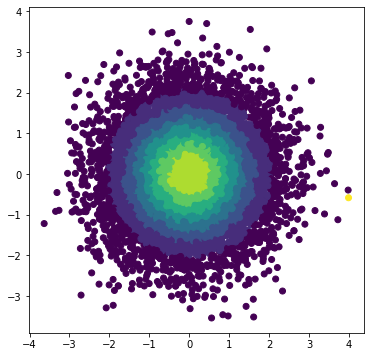

In [62]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

ax.scatter(x[:, 0], x[:, 1], c=density_colors)

plt.show()

**In 3D space**

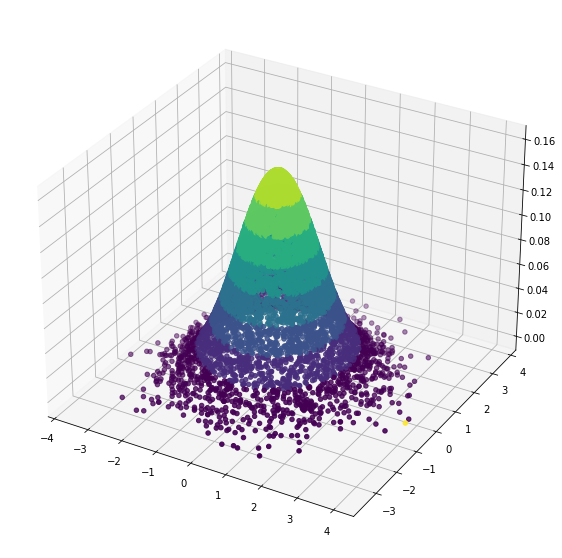

In [63]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

ax.scatter(x[:, 0], x[:, 1], density, c=density_colors)

plt.show()

Let's construct a function to plot with different covariance matrices, the mean does not really matter here.

In [88]:
def plot2d(cov):
    x = np.random.multivariate_normal(mean, cov, 10000)
    density = stats.multivariate_normal.pdf(x, mean=mean, cov=cov, allow_singular=True)
    
    color_count = 8
    density_ranges = np.linspace(density.min(), density.max(), color_count+1)
    
    density_colors = np.array(list(map(lambda x : determine_color(x), density)))
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot()

    ax.scatter(x[:, 0], x[:, 1], c=density_colors)

    plt.show()
    
    
def plot3d(cov):
    x = np.random.multivariate_normal(mean, cov, 10000)
    density = stats.multivariate_normal.pdf(x, mean=mean, cov=cov, allow_singular=True)
    
    color_count = 8
    density_ranges = np.linspace(density.min(), density.max(), color_count+1)
    
    density_colors = np.array(list(map(lambda x : determine_color(x), density)))
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(projection="3d")

    ax.scatter(x[:, 0], x[:, 1], density, c=density_colors)

    plt.show()

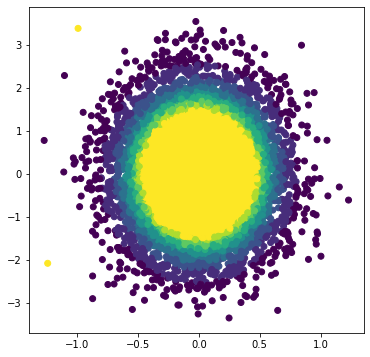

In [85]:
# diagnal is the variance of each varable
plot2d([[0.1, 0],
        [0, 1]])

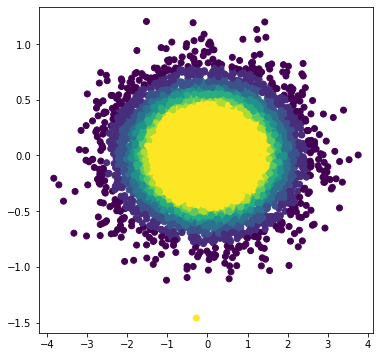

In [86]:
# diagnal is the variance of each varable
plot2d([[1, 0],
        [0, 0.1]])

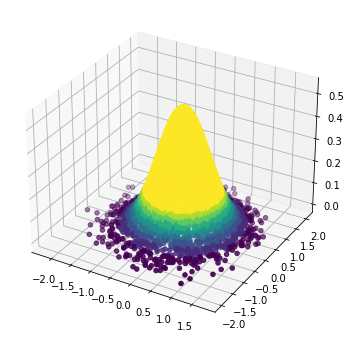

In [94]:
# The variance is low, so the certainty is high
plot3d([[0.3, 0],
        [0, 0.3]])

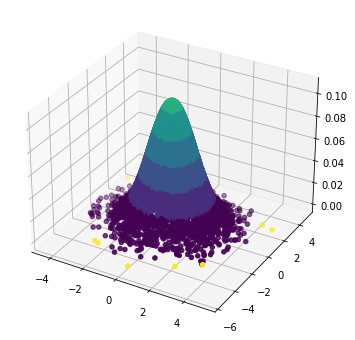

In [97]:
# The variance is high, so the certainty is low
plot3d([[1.5, 0],
        [0, 1.5]])

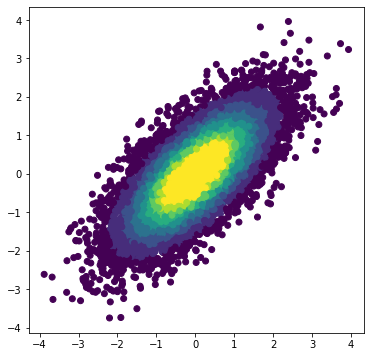

In [110]:
# the colloration between features
# from ghraph we can see that when x increases y increases and vice versa. (positively corrolated)
plot2d([[1, 0.7],
        [0.7, 1]])

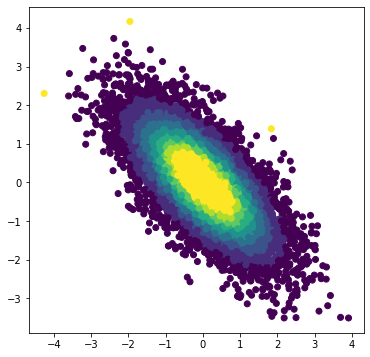

In [113]:
# the colloration between features.
# from ghraph we can see that when x increases y decreases and vice versa. (negatively corrolated)
plot2d([[1, -0.7],
        [-0.7, 1]])